# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [156]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [157]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [158]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [159]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [160]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

## 1.2 preprocessing of `project_subject_categories`

In [161]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [162]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [163]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [164]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [165]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

My classroom consists of twenty-two amazing sixth graders from different cultures and backgrounds. They are a social bunch who enjoy working in partners and working with groups. They are hard-working and eager to head to middle school next year. My job is to get them ready to make this transition and make it as smooth as possible. In order to do this, my students need to come to school every day and feel safe and ready to learn. Because they are getting ready to head to middle school, I give them lots of choice- choice on where to sit and work, the order to complete assignments, choice of projects, etc. Part of the students feeling safe is the ability for them to come into a welcoming, encouraging environment. My room is colorful and the atmosphere is casual. I want them to take ownership of the classroom because we ALL share it together. Because my time with them is limited, I want to ensure they get the most of this time and enjoy it to the best of their abilities.Currently, we have 

In [166]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [167]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [168]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [169]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [170]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [173]:
#Adding processed columns at place of original columns
project_data['essay'] = essay
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [176]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [177]:
price_data.head()

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8

In [178]:
# we cannot remove rows where teacher prefix is not available therefore we are replacing 'nan' value with
# 'null'(string)
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

In [179]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [180]:
 #train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(49041, 15) (49041,)
(24155, 15) (24155,)
(36052, 15) (36052,)


In [181]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler()
X_new, y_new = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_new))

Resampled dataset shape Counter({0: 41615, 1: 41615})


In [182]:
#Sample randomly
idx = np.random.choice(np.arange(len(X_new)), 50000, replace=False)
X_new1 = X_new[idx]
y_new1 = y_new[idx]


X_new_1 = X_train
y_neq_1 = y_train

In [183]:
X_train = pd.DataFrame(X_train,columns = X_train.columns)
X_train.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
91354      181463  p136014  cc16173947f2399e46b55124f667d986            Ms.   

      school_state                Date project_grade_category  \
91354           NY 2017-02-13 13:31:08             Grades 3-5   

                         project_title  \
91354  Make OUR Makerspace! @ P.S. 28!   

                                project_resource_summary  \
91354  My students need 3D Printer Pens and related l...   

       teacher_number_of_previously_posted_projects clean_categories  \
91354                                             4     Math_Science   

               clean_subcategories  \
91354  AppliedSciences Mathematics   

                                                   essay   price  quantity  
91354  students fourth grade would love welcome new c...  293.01        18

In [184]:
X_train.shape

(49041, 15)

In [185]:
y_train.shape

(49041,)

In [186]:
X_test.shape


(36052, 15)

In [187]:
y_test.shape


(36052,)

In [188]:
X_cv.shape

(24155, 15)

In [189]:
y_cv.shape

(24155,)

In [190]:
# similarly you can preprocess the titles also

## 1.5 Preparing data for models

In [191]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# <h2> Make Data Model Ready: encoding numerical, categorical features</h2>

# Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

# clean_categories_one_hot_encoding

In [192]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(X_train['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

# cross-validation data
cv_categories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)
print("CV : Shape of matrix after one hot encoding ",cv_categories_one_hot.shape)

# test data
test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)
print("test : Shape of matrix after one hot encoding ",test_categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (49041, 9)
CV : Shape of matrix after one hot encoding  (24155, 9)
test : Shape of matrix after one hot encoding  (36052, 9)


# clean_sub_categories_one_hot_encoding

In [193]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

# cross-validation data
cv_sub_categories_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)
print("CV : Shape of matrix after one hot encoding ",cv_sub_categories_one_hot.shape)

# test data
test_sub_categories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)
print("test : Shape of matrix after one hot encoding ",test_sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (49041, 30)
CV : Shape of matrix after one hot encoding  (24155, 30)
test : Shape of matrix after one hot encoding  (36052, 30)


# school_state_one_hot_encoding

In [194]:
vectorizer = CountVectorizer(vocabulary=list(X_train['school_state'].unique()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)
print(vectorizer.get_feature_names())

school_state_one_hot = vectorizer.transform(X_train['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

# cross-validation data
cv_school_state_one_hot = vectorizer.transform(X_cv['school_state'].values)
print("CV: Shape of matrix after one hot encoding ",cv_school_state_one_hot.shape)

# test data
test_school_state_one_hot = vectorizer.transform(X_test['school_state'].values)
print("test: Shape of matrix after one hot encoding ",test_school_state_one_hot.shape)


['NY', 'NC', 'MO', 'FL', 'OH', 'CA', 'NJ', 'VA', 'WA', 'KS', 'TX', 'GA', 'MI', 'WI', 'AZ', 'SC', 'CT', 'LA', 'TN', 'IN', 'MD', 'PA', 'DC', 'MS', 'IL', 'WV', 'NM', 'MN', 'AL', 'CO', 'NV', 'OK', 'UT', 'KY', 'MA', 'VT', 'DE', 'WY', 'IA', 'AK', 'OR', 'MT', 'ID', 'RI', 'ME', 'HI', 'NE', 'NH', 'AR', 'SD', 'ND']
Shape of matrix after one hot encodig  (49041, 51)
CV: Shape of matrix after one hot encoding  (24155, 51)
test: Shape of matrix after one hot encoding  (36052, 51)


# teacher_prefix_one_hot_encoding

In [195]:
## teacher_prefix
tl = list(X_train['teacher_prefix'].unique())
del tl[4]
vectorizer = CountVectorizer(vocabulary=tl, lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values.astype(str))
print("\n" + str(vectorizer.get_feature_names()))

teacher_prefix_one_hot = vectorizer.transform(X_train['teacher_prefix'].values.astype(str))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

# cross-validation data
cv_teacher_prefix_one_hot = vectorizer.transform(X_cv['teacher_prefix'].values.astype(str))
print("CV: Shape of matrix after one hot encoding ",cv_teacher_prefix_one_hot.shape)

# test data
test_teacher_prefix_one_hot = vectorizer.transform(X_test['teacher_prefix'].values.astype(str))
print("test: Shape of matrix after one hot encoding ",test_teacher_prefix_one_hot.shape)



['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'null']
Shape of matrix after one hot encodig  (49041, 5)
CV: Shape of matrix after one hot encoding  (24155, 5)
test: Shape of matrix after one hot encoding  (36052, 5)


# project_grade_category_one_hot_encoding

In [196]:
# school_state
# project_grade_category
vectorizer = CountVectorizer(vocabulary=list(X_train['project_grade_category'].unique()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
print("\n" + str(vectorizer.get_feature_names()))

project_grade_category_one_hot = vectorizer.transform(X_train['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

# cross-validation data
cv_project_grade_category_one_hot = vectorizer.transform(X_cv['project_grade_category'].values)
print("CV: Shape of matrix after one hot encoding ",cv_project_grade_category_one_hot.shape)

# test data
test_project_grade_category_one_hot = vectorizer.transform(X_test['project_grade_category'].values)
print("test: Shape of matrix after one hot encoding ",test_project_grade_category_one_hot.shape)


['Grades 3-5', 'Grades PreK-2', 'Grades 9-12', 'Grades 6-8']
Shape of matrix after one hot encodig  (49041, 4)
CV: Shape of matrix after one hot encoding  (24155, 4)
test: Shape of matrix after one hot encoding  (36052, 4)


### 1.5.3 Vectorizing Numerical features

# standardizing_teacher_number_of_previously_posted_projects

In [197]:
from sklearn.preprocessing import StandardScaler

# standardizing the attribute 'teacher_number_of_previously_posted_projects'
teacher_prev_proj_scalar = StandardScaler()
teacher_prev_proj_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_prev_proj_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_prev_proj_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
teacher_prev_proj_standardized = teacher_prev_proj_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

teacher_prev_proj_wo_std = X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

print("Shape of teacher_previous_projects:", teacher_prev_proj_wo_std.shape)

Mean : 11.079097082033401, Standard deviation : 27.358224078970846
Shape of teacher_previous_projects: (49041, 1)


In [198]:
#Cross Validation
# standardizing the attribute 'teacher_number_of_previously_posted_projects'
teacher_prev_proj_scalar = StandardScaler()
teacher_prev_proj_scalar.fit(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_prev_proj_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_prev_proj_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
cv_teacher_prev_proj_standardized = teacher_prev_proj_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

cv_teacher_prev_proj_wo_std = X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
print("Shape of teacher_previous_projects:", cv_teacher_prev_proj_wo_std.shape)

Mean : 11.07356654936866, Standard deviation : 27.80061359054575
Shape of teacher_previous_projects: (24155, 1)


In [199]:
# Test Data
# standardizing the attribute 'teacher_number_of_previously_posted_projects'
teacher_prev_proj_scalar = StandardScaler()
teacher_prev_proj_scalar.fit(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_prev_proj_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_prev_proj_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
test_teacher_prev_proj_standardized = teacher_prev_proj_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

test_teacher_prev_proj_wo_std = X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
print("Shape of teacher_previous_projects:", test_teacher_prev_proj_wo_std.shape)

Mean : 11.30725063796738, Standard deviation : 28.32065426742479
Shape of teacher_previous_projects: (36052, 1)


# price_standardization

In [200]:
price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(X_train['price'].values.reshape(-1, 1))

price_wo_std = X_train['price'].values.reshape(-1,1)
print("Shape of price:", price_wo_std.shape)

Mean : 298.7111932872495, Standard deviation : 357.31089523466187
Shape of price: (49041, 1)


In [201]:
price_scalar = StandardScaler()
price_scalar.fit(X_cv['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_price_standardized = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

cv_price_wo_std = X_cv['price'].values.reshape(-1,1)
print("Shape of price:", cv_price_wo_std.shape)



Mean : 299.9693835644794, Standard deviation : 394.5127583436023
Shape of price: (24155, 1)


In [202]:
price_scalar = StandardScaler()
price_scalar.fit(X_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
test_price_standardized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

test_price_wo_std = X_test['price'].values.reshape(-1,1)
print("Shape of price:", test_price_wo_std.shape)

Mean : 296.07472123599246, Standard deviation : 362.34747625028234
Shape of price: (36052, 1)


# quantity_standardization

In [203]:
qty_scalar = StandardScaler()
qty_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {qty_scalar.mean_[0]}, Standard deviation : {np.sqrt(qty_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
qty_standardized = qty_scalar.transform(X_train['quantity'].values.reshape(-1, 1))

qty_wo_std = X_train['quantity'].values.reshape(-1,1)
print("Shape of quantity:", qty_wo_std.shape)

Mean : 16.874105340429438, Standard deviation : 25.945013218392223
Shape of quantity: (49041, 1)


In [204]:
qty_scalar = StandardScaler()
qty_scalar.fit(X_cv['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {qty_scalar.mean_[0]}, Standard deviation : {np.sqrt(qty_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_qty_standardized = qty_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))

cv_qty_wo_std = X_cv['quantity'].values.reshape(-1,1)
print("Shape of quantity:", cv_qty_wo_std.shape)

Mean : 17.094887186917823, Standard deviation : 27.13275208125218
Shape of quantity: (24155, 1)


In [205]:
qty_scalar = StandardScaler()
qty_scalar.fit(X_test['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {qty_scalar.mean_[0]}, Standard deviation : {np.sqrt(qty_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
test_qty_standardized = qty_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

test_qty_wo_std = X_test['quantity'].values.reshape(-1,1)
print("Shape of quantity:", test_qty_wo_std.shape)

Mean : 17.003467214024187, Standard deviation : 25.854318029124045
Shape of quantity: (36052, 1)


# Preprocess essays  for train, cv and test_data

In [206]:
# Preprocess essays  for train, cv and test_data

# Combining all the above statements 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

cv_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    cv_preprocessed_essays.append(sent.lower().strip())
    
test_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    test_preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:19<00:00, 1867.72it/s]


# Preprocess project_titles for train, cv and test_data

In [207]:
## Preprocess project_titles  for train, cv and test_data
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
    
cv_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    cv_preprocessed_titles.append(sent.lower().strip())
    
test_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    test_preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 26983.01it/s]


# numbe of words in title andnumber of wo essay

In [208]:
# numbe of words in title andnumber of wo essay
train_word_count_essay = []
train_word_count_title = []
cv_word_count_essay = []
cv_word_count_title = []
test_word_count_essay = []
test_word_count_title = []

# training data
for title, essay in tqdm(zip(preprocessed_titles, preprocessed_essays)):
  train_word_count_title.append(len(title.split()))
  train_word_count_essay.append(len(essay.split()))

train_word_count_title = np.array(train_word_count_title).reshape(-1,1)
train_word_count_essay = np.array(train_word_count_essay).reshape(-1,1)

# cross validation data
for title, essay in tqdm(zip(cv_preprocessed_titles, cv_preprocessed_essays)):
  cv_word_count_title.append(len(title.split()))
  cv_word_count_essay.append(len(essay.split()))
  
cv_word_count_title = np.array(cv_word_count_title).reshape(-1,1)
cv_word_count_essay = np.array(cv_word_count_essay).reshape(-1,1)
  
# test data
for title, essay in tqdm(zip(test_preprocessed_titles, test_preprocessed_essays)):
  test_word_count_title.append(len(title.split()))
  test_word_count_essay.append(len(essay.split()))
  
test_word_count_title = np.array(test_word_count_title).reshape(-1,1)
test_word_count_essay = np.array(test_word_count_essay).reshape(-1,1)

49041it [00:00, 64681.68it/s]
24155it [00:00, 54046.27it/s]
36052it [00:00, 68375.82it/s]


In [209]:
test_word_count_essay.shape

(36052, 1)

In [210]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#  sentiment polarity

In [211]:
# sentiment polarity
import warnings
warnings.filterwarnings("ignore")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

sentiment_neg = []
sentiment_pos = []
sentiment_neu = []
sentiment_compound = []

# training data
for sentence in tqdm(preprocessed_essays):
  ss = sid.polarity_scores(sentence)
  sentiment_neg.append(ss['neg'])
  sentiment_pos.append(ss['pos'])
  sentiment_neu.append(ss['neu'])
  sentiment_compound.append(ss['compound'])

sentiment_neg = np.array(sentiment_neg).reshape(-1,1)
sentiment_pos = np.array(sentiment_pos).reshape(-1,1)
sentiment_neu = np.array(sentiment_neu).reshape(-1,1)
sentiment_compound = np.array(sentiment_compound).reshape(-1,1)

# cross validation
cv_sentiment_neg = []
cv_sentiment_pos = []
cv_sentiment_neu = []
cv_sentiment_compound = []

for sentence in tqdm(cv_preprocessed_essays):
  ss = sid.polarity_scores(sentence)
  cv_sentiment_neg.append(ss['neg'])
  cv_sentiment_pos.append(ss['pos'])
  cv_sentiment_neu.append(ss['neu'])
  cv_sentiment_compound.append(ss['compound'])
  
cv_sentiment_neg = np.array(cv_sentiment_neg).reshape(-1,1)
cv_sentiment_pos = np.array(cv_sentiment_pos).reshape(-1,1)
cv_sentiment_neu = np.array(cv_sentiment_neu).reshape(-1,1)
cv_sentiment_compound = np.array(cv_sentiment_compound).reshape(-1,1)

# test data
test_sentiment_neg = []
test_sentiment_pos = []
test_sentiment_neu = []
test_sentiment_compound = []

for sentence in tqdm(test_preprocessed_essays):
  ss = sid.polarity_scores(sentence)
  test_sentiment_neg.append(ss['neg'])
  test_sentiment_pos.append(ss['pos'])
  test_sentiment_neu.append(ss['neu'])
  test_sentiment_compound.append(ss['compound'])

test_sentiment_neg = np.array(test_sentiment_neg).reshape(-1,1)
test_sentiment_pos = np.array(test_sentiment_pos).reshape(-1,1)
test_sentiment_neu = np.array(test_sentiment_neu).reshape(-1,1)
test_sentiment_compound = np.array(test_sentiment_compound).reshape(-1,1)

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:33<00:00, 387.52it/s]


# <h2> Make Data Model Ready: encoding eassay, and project_title</h2>

#  Vectorizing Text data

# essay_vectorizing

#  Bag of words

In [212]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10, max_features=5000, ngram_range=(1,2))
text_bow = vectorizer.fit_transform(preprocessed_essays)
cv_text_bow = vectorizer.transform(cv_preprocessed_essays)
test_text_bow = vectorizer.transform(test_preprocessed_essays)


print(text_bow.shape)
print(cv_text_bow.shape)
print(test_text_bow.shape)

(49041, 234)
(24155, 234)
(36052, 234)


# project_title_vectorizing

In [213]:
# project_title
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,2))
title_bow = vectorizer.fit_transform(preprocessed_titles)
cv_title_bow = vectorizer.transform(cv_preprocessed_titles)
test_title_bow = vectorizer.transform(test_preprocessed_titles)


print(title_bow.shape)
print(cv_title_bow.shape)
print(test_title_bow.shape)

(49041, 5000)
(24155, 5000)
(36052, 5000)


# essay_tfidf_vectorizing

In [214]:
## Essays
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, max_features=5000, ngram_range=(1,2))
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
cv_text_tfidf = vectorizer.transform(cv_preprocessed_essays)
test_text_tfidf = vectorizer.transform(test_preprocessed_essays)


print(text_tfidf.shape)
print(cv_text_tfidf.shape)
print(test_text_tfidf.shape)

(49041, 234)
(24155, 234)
(36052, 234)


# project_title_vectorizing

In [215]:
## project_title
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
title_tfidf = vectorizer.fit_transform(preprocessed_titles)
cv_title_tfidf = vectorizer.transform(cv_preprocessed_titles)
test_title_tfidf = vectorizer.transform(test_preprocessed_titles)



print(title_tfidf.shape)
print(cv_title_tfidf.shape)
print(test_title_tfidf.shape)

(49041, 5000)
(24155, 5000)
(36052, 5000)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [216]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [217]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors (1)', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# essay_Word2Vec

In [218]:
## Essays
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word] # adding two vectors of dimension 1 x 300
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

#print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

cv_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_vectors.append(vector)

#print(len(cv_avg_w2v_vectors))
print(len(cv_avg_w2v_vectors[0]))

test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors.append(vector)

#print(len(test_avg_w2v_vectors))
print(len(test_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:16<00:00, 2974.48it/s]


300


100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:07<00:00, 3047.87it/s]


300


100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:12<00:00, 2937.41it/s]


300


# project_title_Word2Vec

In [219]:
## project_title
# average Word2Vec
# compute average word2vec for each title.
title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_avg_w2v_vectors.append(vector)

print(len(title_avg_w2v_vectors))
print(len(title_avg_w2v_vectors[0]))

cv_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_titles): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_title_avg_w2v_vectors.append(vector)

print(len(cv_title_avg_w2v_vectors))
print(len(cv_title_avg_w2v_vectors[0]))

test_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_titles): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_title_avg_w2v_vectors.append(vector)

print(len(test_title_avg_w2v_vectors))
print(len(test_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 41307.82it/s]


49041
300


100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 39780.12it/s]


24155
300


100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 42096.03it/s]


36052
300


# TFIDF weighted Word2Vec

In [220]:
## Essays - train
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# tfidf Word2Vec
# compute tfidf word2vec for each review.
tfidf_w2v_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))


## Essays - cross-validation
tfidf_model = TfidfVectorizer()
tfidf_model.fit(cv_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# tfidf Word2Vec
# compute tfidf word2vec for each review.
cv_tfidf_w2v_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_vectors.append(vector)

print(len(cv_tfidf_w2v_vectors))
print(len(cv_tfidf_w2v_vectors[0]))



## Essays - test
tfidf_model = TfidfVectorizer()
tfidf_model.fit(test_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# tfidf Word2Vec
# compute tfidf word2vec for each review.
test_tfidf_w2v_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors.append(vector)

print(len(test_tfidf_w2v_vectors))
print(len(test_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [01:56<00:00, 419.35it/s]


49041
300


100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [00:55<00:00, 433.22it/s]


24155
300


100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:28<00:00, 409.18it/s]


36052
300


# project_title_tfidf_W2V

In [221]:
## project_title - train
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
title_tfidf_words = set(tfidf_model.get_feature_names())

# tfidf Word2Vec
# compute average word2vec for each review.
title_tfidf_w2v_vectors = []; # the tfidf-w2v for each title is stored in this list
for sentence in tqdm(preprocessed_titles): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in title_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_tfidf_w2v_vectors.append(vector)

print(len(title_tfidf_w2v_vectors))
print(len(title_tfidf_w2v_vectors[0]))



## project_title - cross-validation
tfidf_model = TfidfVectorizer()
tfidf_model.fit(cv_preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
title_tfidf_words = set(tfidf_model.get_feature_names())

# tfidf Word2Vec
# compute average word2vec for each review.
cv_title_tfidf_w2v_vectors = []; # the tfidf-w2v for each title is stored in this list
for sentence in tqdm(cv_preprocessed_titles): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in title_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_title_tfidf_w2v_vectors.append(vector)

print(len(cv_title_tfidf_w2v_vectors))
print(len(cv_title_tfidf_w2v_vectors[0]))


## project_title - test
tfidf_model = TfidfVectorizer()
tfidf_model.fit(test_preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
title_tfidf_words = set(tfidf_model.get_feature_names())

# tfidf Word2Vec
# compute average word2vec for each review.
test_title_tfidf_w2v_vectors = []; # the tfidf-w2v for each title is stored in this list
for sentence in tqdm(test_preprocessed_titles): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in title_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_title_tfidf_w2v_vectors.append(vector)

print(len(test_title_tfidf_w2v_vectors))
print(len(test_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:02<00:00, 20320.77it/s]


49041
300


100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:01<00:00, 21580.36it/s]


24155
300


100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 19180.36it/s]


36052
300


<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

# Set 1: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW with bi-grams with min_df=10 and max_features=5000)

In [222]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

# train data
X_train_bow = hstack((categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot, project_grade_category_one_hot, price_wo_std, qty_wo_std, teacher_prev_proj_wo_std, title_bow, text_bow))
print("Data Matrix Dimensions:", X_train_bow.shape)


# cross-validation data
X_cv_bow = hstack((cv_categories_one_hot, cv_sub_categories_one_hot, cv_school_state_one_hot, cv_teacher_prefix_one_hot, cv_project_grade_category_one_hot, cv_price_wo_std, cv_qty_wo_std, cv_teacher_prev_proj_wo_std, cv_title_bow, cv_text_bow))
print("CV Data Matrix Dimensions:", X_cv_bow.shape)


# test_data
X_test_bow = hstack((test_categories_one_hot, test_sub_categories_one_hot, test_school_state_one_hot, test_teacher_prefix_one_hot, test_project_grade_category_one_hot, test_price_wo_std, test_qty_wo_std, test_teacher_prev_proj_wo_std, test_title_bow, test_text_bow))
print("Test Data Matrix Dimensions:", X_test_bow.shape)


Data Matrix Dimensions: (49041, 5336)
CV Data Matrix Dimensions: (24155, 5336)
Test Data Matrix Dimensions: (36052, 5336)


In [223]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib
import itertools
import seaborn as sns
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle
matplotlib.rc("lines", markeredgewidth=0.5)
#from google.colab import drive
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from scipy import sparse

In [224]:
# Please write all the code with proper documentation

C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

l2_auc_scores_cv = dict()
l2_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l2')
  lr.fit(X_train_bow, y_train)
  pred_cv = lr.predict_proba(X_cv_bow)
  pred_train = lr.predict_proba(X_train_bow)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_cv, pred_cv[:, 1])
  l2_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_train, pred_train[:, 1])
  l2_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")

C: 1e-05
Validation-AUC: 0.61613246087115
Train-AUC: 0.613925679908802


C: 0.0001
Validation-AUC: 0.6237339414560491
Train-AUC: 0.6249408210430867


C: 0.001
Validation-AUC: 0.6307635127331097
Train-AUC: 0.6364471362749977


C: 0.01
Validation-AUC: 0.6454352523184466
Train-AUC: 0.6680902627903902


C: 0.1
Validation-AUC: 0.647038281918325
Train-AUC: 0.7222948446377844


C: 1.0
Validation-AUC: 0.6254405713378121
Train-AUC: 0.77243655928126


C: 10
Validation-AUC: 0.6068595819708615
Train-AUC: 0.7942910674358747


C: 100
Validation-AUC: 0.6029535605266438
Train-AUC: 0.7955111604751324


C: 1000
Validation-AUC: 0.6031065863872538
Train-AUC: 0.7938791599563529




In [225]:
print(np.log(list(l2_auc_scores_cv.keys())))
       
print(np.log(list(l2_auc_scores_train.keys())))

[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]
[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]


In [226]:
l1_auc_scores_cv = dict()
l1_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l1')
  lr.fit(X_train_bow, y_train)
  pred_cv = lr.predict_proba(X_cv_bow)
  pred_train = lr.predict_proba(X_train_bow)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_cv, pred_cv[:, 1])
  l1_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_train, pred_train[:, 1])
  l1_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")

C: 1e-05
Validation-AUC: 0.412301741063702
Train-AUC: 0.4094331967599964


C: 0.0001
Validation-AUC: 0.48064727791259865
Train-AUC: 0.4772162916975303


C: 0.001
Validation-AUC: 0.6150987792535727
Train-AUC: 0.6141436534008877


C: 0.01
Validation-AUC: 0.6132446663797448
Train-AUC: 0.616308176353599


C: 0.1
Validation-AUC: 0.6440609677653713
Train-AUC: 0.6521047849939905


C: 1.0
Validation-AUC: 0.6324515596644908
Train-AUC: 0.749398323136957


C: 10
Validation-AUC: 0.6028345522708245
Train-AUC: 0.7976771395830589


C: 100
Validation-AUC: 0.5969363931888698
Train-AUC: 0.7989430982756889


C: 1000
Validation-AUC: 0.5964651893314494
Train-AUC: 0.7989251487357385




In [227]:
print(np.log(list(l1_auc_scores_cv.keys())))
       
print(np.log(list(l1_auc_scores_train.keys())))

[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]
[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]


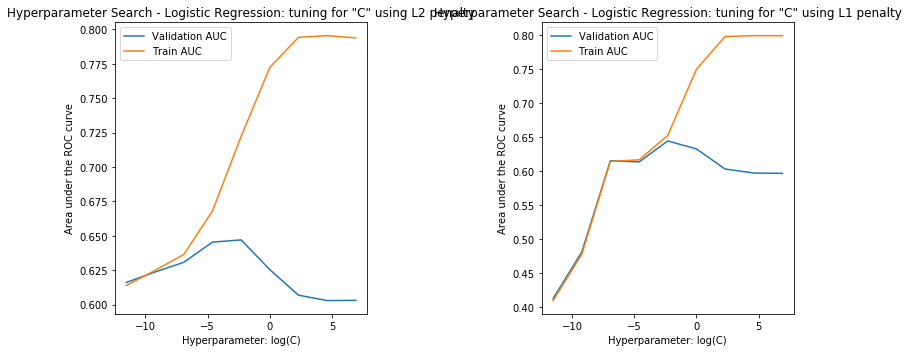

In [228]:
## plot the AUC-ROC against the 'C' values for train and cross-validation

## plot the AUC-ROC against the 'C' values for train and cross-validation
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.log(list(l2_auc_scores_cv.keys())), l2_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l2_auc_scores_train.keys())), l2_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L2 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()


plt.subplot(122)
plt.plot(np.log(list(l1_auc_scores_cv.keys())), l1_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l1_auc_scores_train.keys())), l1_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L1 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.tight_layout()
plt.show()

In [229]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr1 = LogisticRegression(C=0.1, penalty='l1')
lr1.fit(X_train_bow, y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr1.predict_proba(X_test_bow)
fpr_test, tpr_test, threshold = roc_curve(y_test, pred_test_scores[:, 1])
l1_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr1.predict_proba(X_train_bow)
fpr_train, tpr_train, threshold = roc_curve(y_train, pred_train_scores[:, 1])
l1_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)

In [230]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr2 = LogisticRegression(C=0.01, penalty='l2')
lr2.fit(X_train_bow, y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr2.predict_proba(X_test_bow)
fpr_test, tpr_test, threshold = roc_curve(y_test, pred_test_scores[:, 1])
l2_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr2.predict_proba(X_train_bow)
fpr_train, tpr_train, threshold = roc_curve(y_train, pred_train_scores[:, 1])
l2_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)

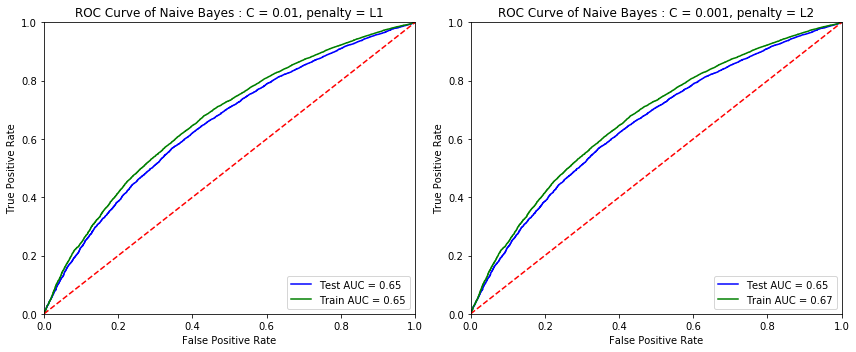

In [231]:
# Area under the ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l1_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l1_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.01, penalty = L1')

plt.subplot(122)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l2_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l2_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.001, penalty = L2')
plt.tight_layout()
plt.show()

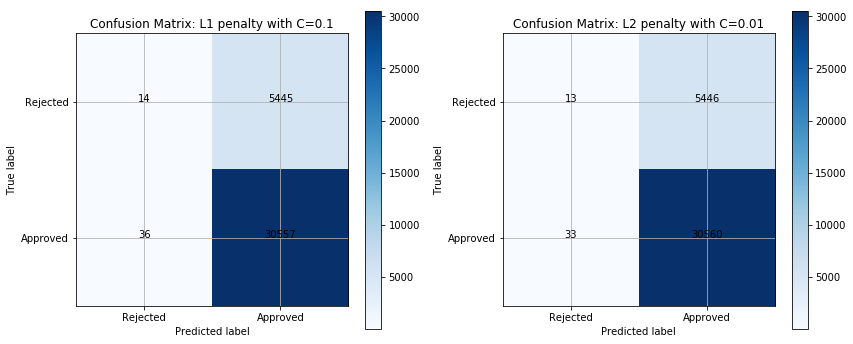

In [232]:
## Confusion Matrix:

# predict the response on the test data
pred_test = lr1.predict(X_test_bow)

c_mat1 = confusion_matrix(y_test, pred_test)

pred_test = lr2.predict(X_test_bow)

c_mat2 = confusion_matrix(y_test, pred_test)

classes = ['Rejected', 'Approved']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title("Confusion Matrix: L1 penalty with C=0.1")
plt.imshow(c_mat1, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat1.shape[0]), range(c_mat1.shape[1])):
        plt.text(j, i, c_mat1[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.subplot(122)
plt.title("Confusion Matrix: L2 penalty with C=0.01")
plt.imshow(c_mat2, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat2.shape[0]), range(c_mat2.shape[1])):
        plt.text(j, i, c_mat2[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.tight_layout()
plt.show()

# Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF with bi-grams with min_df=10 and max_features=5000)

In [233]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

# train data
X_train_tfidf = hstack((categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot, project_grade_category_one_hot, price_wo_std, qty_wo_std, teacher_prev_proj_wo_std, title_tfidf, text_tfidf))
print("Data Matrix Dimensions:", X_train_tfidf.shape)


# cross-validation data
X_cv_tfidf = hstack((cv_categories_one_hot, cv_sub_categories_one_hot, cv_school_state_one_hot, cv_teacher_prefix_one_hot, cv_project_grade_category_one_hot, cv_price_wo_std, cv_qty_wo_std, cv_teacher_prev_proj_wo_std, cv_title_tfidf, cv_text_tfidf))
print("CV Data Matrix Dimensions:", X_cv_tfidf.shape)


# test_data
X_test_tfidf = hstack((test_categories_one_hot, test_sub_categories_one_hot, test_school_state_one_hot, test_teacher_prefix_one_hot, test_project_grade_category_one_hot, test_price_wo_std, test_qty_wo_std, test_teacher_prev_proj_wo_std, test_title_tfidf, test_text_tfidf))
print("Test Data Matrix Dimensions:", X_test_tfidf.shape)


Data Matrix Dimensions: (49041, 5336)
CV Data Matrix Dimensions: (24155, 5336)
Test Data Matrix Dimensions: (36052, 5336)


In [234]:
# Please write all the code with proper documentation

C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

l2_auc_scores_cv = dict()
l2_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l2')
  lr.fit(X_train_tfidf, y_train)
  pred_cv = lr.predict_proba(X_cv_tfidf)
  pred_train = lr.predict_proba(X_train_tfidf)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_cv, pred_cv[:, 1])
  l2_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_train, pred_train[:, 1])
  l2_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")

C: 1e-05
Validation-AUC: 0.45441663636431795
Train-AUC: 0.4507768685149116


C: 0.0001
Validation-AUC: 0.4923640749227207
Train-AUC: 0.4928411283856783


C: 0.001
Validation-AUC: 0.6007668688699775
Train-AUC: 0.6074469638338613


C: 0.01
Validation-AUC: 0.6273197171666949
Train-AUC: 0.6401166700681373


C: 0.1
Validation-AUC: 0.6466077124233334
Train-AUC: 0.6932986523542357


C: 1.0
Validation-AUC: 0.6356924502235063
Train-AUC: 0.7555320922209632


C: 10
Validation-AUC: 0.6097703817012714
Train-AUC: 0.789921650436091


C: 100
Validation-AUC: 0.6143530333151346
Train-AUC: 0.7825740206571473


C: 1000
Validation-AUC: 0.6019581253690409
Train-AUC: 0.7932934328467649




In [235]:
print(np.log(list(l2_auc_scores_cv.keys())))
       
print(np.log(list(l2_auc_scores_train.keys())))

[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]
[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]


In [236]:
l1_auc_scores_cv = dict()
l1_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l1')
  lr.fit(X_train_tfidf, y_train)
  pred_cv = lr.predict_proba(X_cv_tfidf)
  pred_train = lr.predict_proba(X_train_tfidf)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_cv, pred_cv[:, 1])
  l1_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_train, pred_train[:, 1])
  l1_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")

C: 1e-05
Validation-AUC: 0.4123052895667899
Train-AUC: 0.4094364472220263


C: 0.0001
Validation-AUC: 0.44673426058120264
Train-AUC: 0.4429557245651993


C: 0.001
Validation-AUC: 0.608825746166823
Train-AUC: 0.6001475894207929


C: 0.01
Validation-AUC: 0.6112704980414798
Train-AUC: 0.614645399185375


C: 0.1
Validation-AUC: 0.6348699912512057
Train-AUC: 0.6375441599293331


C: 1.0
Validation-AUC: 0.6417186622420834
Train-AUC: 0.7169674231220428


C: 10
Validation-AUC: 0.6039153782865709
Train-AUC: 0.796035107772798


C: 100
Validation-AUC: 0.5950586480848902
Train-AUC: 0.79920201238062


C: 1000
Validation-AUC: 0.593452550230462
Train-AUC: 0.7992604333278464




In [237]:
print(np.log(list(l1_auc_scores_cv.keys())))
       
print(np.log(list(l1_auc_scores_train.keys())))

[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]
[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]


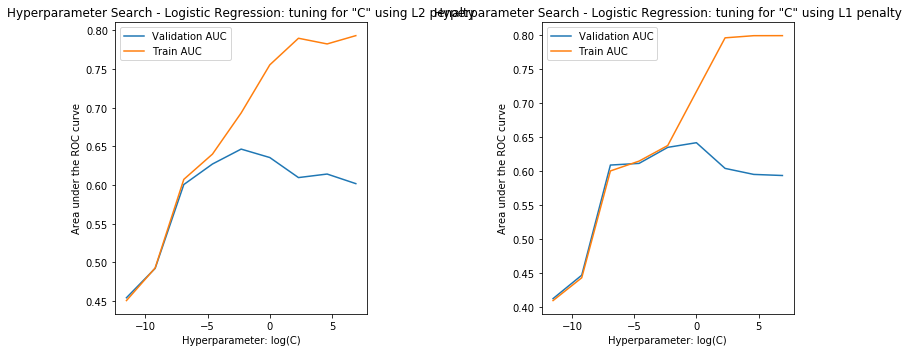

In [238]:
## plot the AUC-ROC against the 'C' values for train and cross-validation

## plot the AUC-ROC against the 'C' values for train and cross-validation
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.log(list(l2_auc_scores_cv.keys())), l2_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l2_auc_scores_train.keys())), l2_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L2 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()


plt.subplot(122)
plt.plot(np.log(list(l1_auc_scores_cv.keys())), l1_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l1_auc_scores_train.keys())), l1_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L1 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.tight_layout()
plt.show()

In [239]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr1 = LogisticRegression(C=1.0, penalty='l1')
lr1.fit(X_train_tfidf, y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr1.predict_proba(X_test_tfidf)
fpr_test, tpr_test, threshold = roc_curve(y_test, pred_test_scores[:, 1])
l1_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr1.predict_proba(X_train_tfidf)
fpr_train, tpr_train, threshold = roc_curve(y_train, pred_train_scores[:, 1])
l1_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)

In [240]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr2 = LogisticRegression(C=0.1, penalty='l2')
lr2.fit(X_train_tfidf, y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr2.predict_proba(X_test_tfidf)
fpr_test, tpr_test, threshold = roc_curve(y_test, pred_test_scores[:, 1])
l2_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr2.predict_proba(X_train_tfidf)
fpr_train, tpr_train, threshold = roc_curve(y_train, pred_train_scores[:, 1])
l2_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)

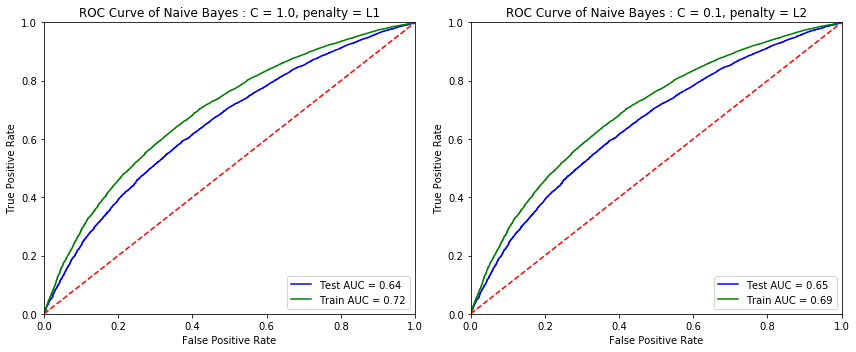

In [241]:
# Area under the ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l1_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l1_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 1.0, penalty = L1')

plt.subplot(122)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l2_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l2_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.1, penalty = L2')
plt.tight_layout()
plt.show()

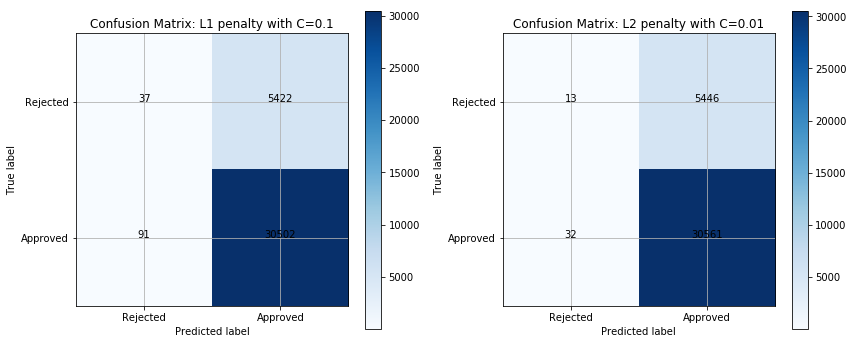

In [242]:
## Confusion Matrix:

# predict the response on the test data
pred_test = lr1.predict(X_test_tfidf)

c_mat1 = confusion_matrix(y_test, pred_test)

pred_test = lr2.predict(X_test_tfidf)

c_mat2 = confusion_matrix(y_test, pred_test)

classes = ['Rejected', 'Approved']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title("Confusion Matrix: L1 penalty with C=0.1")
plt.imshow(c_mat1, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat1.shape[0]), range(c_mat1.shape[1])):
        plt.text(j, i, c_mat1[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.subplot(122)
plt.title("Confusion Matrix: L2 penalty with C=0.01")
plt.imshow(c_mat2, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat2.shape[0]), range(c_mat2.shape[1])):
        plt.text(j, i, c_mat2[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.tight_layout()
plt.show()

# Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)

In [243]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

# train data
X_train_w2v = hstack((categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot, project_grade_category_one_hot, price_wo_std, qty_wo_std, teacher_prev_proj_wo_std, title_avg_w2v_vectors, avg_w2v_vectors))
print("Data Matrix Dimensions:", X_train_w2v.shape)


# cross-validation data
X_cv_w2v = hstack((cv_categories_one_hot, cv_sub_categories_one_hot, cv_school_state_one_hot, cv_teacher_prefix_one_hot, cv_project_grade_category_one_hot, cv_price_wo_std, cv_qty_wo_std, cv_teacher_prev_proj_wo_std, cv_title_avg_w2v_vectors, cv_avg_w2v_vectors))
print("CV Data Matrix Dimensions:", X_cv_w2v.shape)


# test_data
X_test_w2v = hstack((test_categories_one_hot, test_sub_categories_one_hot, test_school_state_one_hot, test_teacher_prefix_one_hot, test_project_grade_category_one_hot, test_price_wo_std, test_qty_wo_std, test_teacher_prev_proj_wo_std, test_title_avg_w2v_vectors, test_avg_w2v_vectors))
print("Test Data Matrix Dimensions:", X_test_w2v.shape)


Data Matrix Dimensions: (49041, 702)
CV Data Matrix Dimensions: (24155, 702)
Test Data Matrix Dimensions: (36052, 702)


In [244]:
# Please write all the code with proper documentation

C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

l2_auc_scores_cv = dict()
l2_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l2')
  lr.fit(X_train_w2v, y_train)
  pred_cv = lr.predict_proba(X_cv_w2v)
  pred_train = lr.predict_proba(X_train_w2v)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_cv, pred_cv[:, 1])
  l2_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_train, pred_train[:, 1])
  l2_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")

C: 1e-05
Validation-AUC: 0.47587623546938007
Train-AUC: 0.4750527686380667


C: 0.0001
Validation-AUC: 0.6003003074150934
Train-AUC: 0.6030160258941935


C: 0.001
Validation-AUC: 0.6444929113047918
Train-AUC: 0.6507945074084162


C: 0.01
Validation-AUC: 0.6482842067093229
Train-AUC: 0.6629314931716513


C: 0.1
Validation-AUC: 0.6422599557056101
Train-AUC: 0.6660163191638537


C: 1.0
Validation-AUC: 0.6393272513057624
Train-AUC: 0.6658281483151687


C: 10
Validation-AUC: 0.6396987102098411
Train-AUC: 0.6658061506637204


C: 100
Validation-AUC: 0.6392676071053625
Train-AUC: 0.6659006842602792


C: 1000
Validation-AUC: 0.6392589626316745
Train-AUC: 0.6659002247624113




In [245]:
print(np.log(list(l2_auc_scores_cv.keys())))
       
print(np.log(list(l2_auc_scores_train.keys())))

[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]
[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]


In [246]:
l1_auc_scores_cv = dict()
l1_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l1')
  lr.fit(X_train_w2v, y_train)
  pred_cv = lr.predict_proba(X_cv_w2v)
  pred_train = lr.predict_proba(X_train_w2v)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_cv, pred_cv[:, 1])
  l1_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_train, pred_train[:, 1])
  l1_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")

C: 1e-05
Validation-AUC: 0.41228945470526573
Train-AUC: 0.40942195362378625


C: 0.0001
Validation-AUC: 0.45487985608979026
Train-AUC: 0.45133359872031786


C: 0.001
Validation-AUC: 0.6145906229391834
Train-AUC: 0.6126421567483783


C: 0.01
Validation-AUC: 0.6304675462311923
Train-AUC: 0.6319464258492273


C: 0.1
Validation-AUC: 0.6463943086492787
Train-AUC: 0.6602855620689558


C: 1.0
Validation-AUC: 0.6403688436839834
Train-AUC: 0.6660543668816717


C: 10
Validation-AUC: 0.6390865934271638
Train-AUC: 0.665912453230317


C: 100
Validation-AUC: 0.6389291119273379
Train-AUC: 0.6658697134568059


C: 1000
Validation-AUC: 0.6389889428910582
Train-AUC: 0.6658743828611955




In [247]:
print(np.log(list(l1_auc_scores_cv.keys())))
       
print(np.log(list(l1_auc_scores_train.keys())))

[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]
[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]


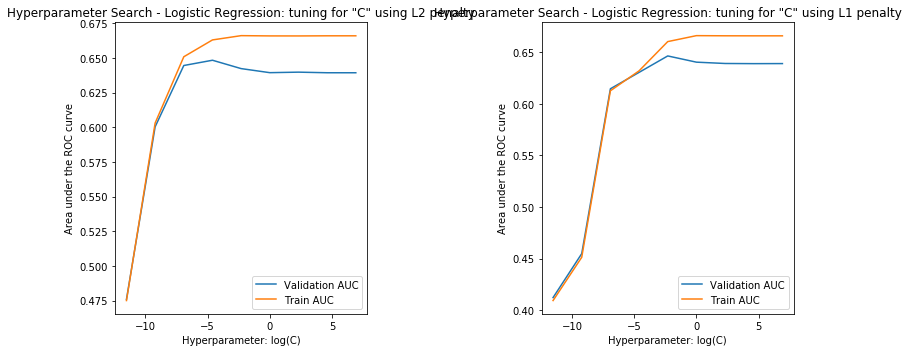

In [248]:
## plot the AUC-ROC against the 'C' values for train and cross-validation

## plot the AUC-ROC against the 'C' values for train and cross-validation
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.log(list(l2_auc_scores_cv.keys())), l2_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l2_auc_scores_train.keys())), l2_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L2 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()


plt.subplot(122)
plt.plot(np.log(list(l1_auc_scores_cv.keys())), l1_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l1_auc_scores_train.keys())), l1_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L1 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.tight_layout()
plt.show()

In [249]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr1 = LogisticRegression(C=1.0, penalty='l1')
lr1.fit(X_train_w2v, y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr1.predict_proba(X_test_w2v)
fpr_test, tpr_test, threshold = roc_curve(y_test, pred_test_scores[:, 1])
l1_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr1.predict_proba(X_train_w2v)
fpr_train, tpr_train, threshold = roc_curve(y_train, pred_train_scores[:, 1])
l1_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)

In [250]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr2 = LogisticRegression(C=1.0, penalty='l2')
lr2.fit(X_train_w2v, y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr2.predict_proba(X_test_w2v)
fpr_test, tpr_test, threshold = roc_curve(y_test, pred_test_scores[:, 1])
l2_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr2.predict_proba(X_train_w2v)
fpr_train, tpr_train, threshold = roc_curve(y_train, pred_train_scores[:, 1])
l2_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)

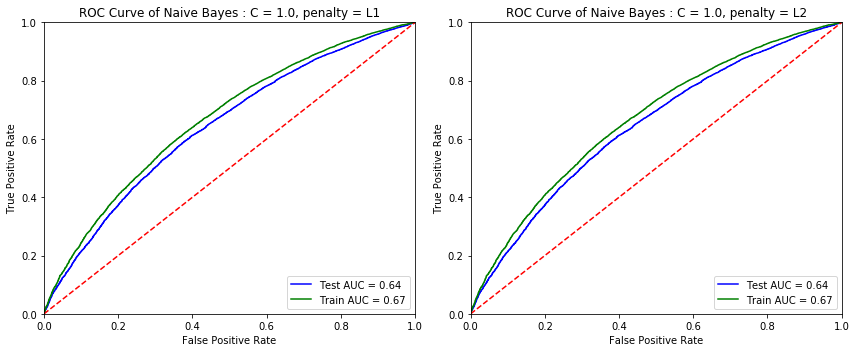

In [251]:
# Area under the ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l1_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l1_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 1.0, penalty = L1')

plt.subplot(122)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l2_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l2_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 1.0, penalty = L2')
plt.tight_layout()
plt.show()

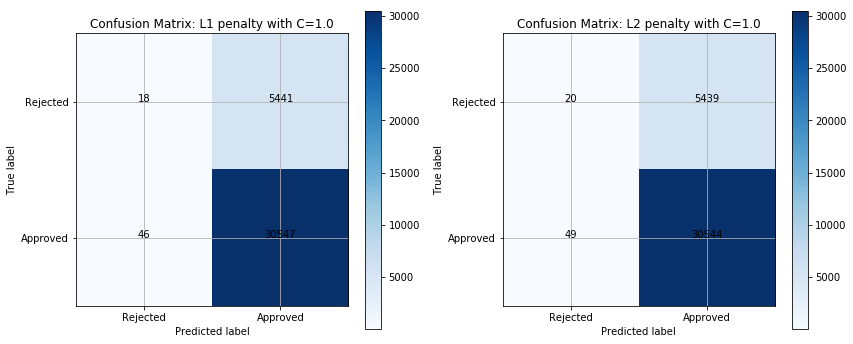

In [252]:
## Confusion Matrix:

# predict the response on the test data
pred_test = lr1.predict(X_test_w2v)

c_mat1 = confusion_matrix(y_test, pred_test)

pred_test = lr2.predict(X_test_w2v)

c_mat2 = confusion_matrix(y_test, pred_test)

classes = ['Rejected', 'Approved']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title("Confusion Matrix: L1 penalty with C=1.0")
plt.imshow(c_mat1, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat1.shape[0]), range(c_mat1.shape[1])):
        plt.text(j, i, c_mat1[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.subplot(122)
plt.title("Confusion Matrix: L2 penalty with C=1.0")
plt.imshow(c_mat2, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat2.shape[0]), range(c_mat2.shape[1])):
        plt.text(j, i, c_mat2[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.tight_layout()
plt.show()

# Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)

In [253]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

# train data
X_train_tfidf_w2v = hstack((categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot, project_grade_category_one_hot, price_wo_std, qty_wo_std, teacher_prev_proj_wo_std, title_tfidf_w2v_vectors, tfidf_w2v_vectors))
print("Data Matrix Dimensions:", X_train_tfidf_w2v.shape)


# cross-validation data
X_cv_tfidf_w2v = hstack((cv_categories_one_hot, cv_sub_categories_one_hot, cv_school_state_one_hot, cv_teacher_prefix_one_hot, cv_project_grade_category_one_hot, cv_price_wo_std, cv_qty_wo_std, cv_teacher_prev_proj_wo_std, cv_title_tfidf_w2v_vectors, cv_tfidf_w2v_vectors))
print("CV Data Matrix Dimensions:", X_cv_tfidf_w2v.shape)


# test_data
X_test_tfidf_w2v = hstack((test_categories_one_hot, test_sub_categories_one_hot, test_school_state_one_hot, test_teacher_prefix_one_hot, test_project_grade_category_one_hot, test_price_wo_std, test_qty_wo_std, test_teacher_prev_proj_wo_std, test_title_tfidf_w2v_vectors, test_tfidf_w2v_vectors))
print("Test Data Matrix Dimensions:", X_test_tfidf_w2v.shape)

Data Matrix Dimensions: (49041, 702)
CV Data Matrix Dimensions: (24155, 702)
Test Data Matrix Dimensions: (36052, 702)


In [254]:
# Please write all the code with proper documentation

C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

l2_auc_scores_cv = dict()
l2_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l2')
  lr.fit(X_train_tfidf_w2v, y_train)
  pred_cv = lr.predict_proba(X_cv_tfidf_w2v)
  pred_train = lr.predict_proba(X_train_tfidf_w2v)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_cv, pred_cv[:, 1])
  l2_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_train, pred_train[:, 1])
  l2_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")

C: 1e-05
Validation-AUC: 0.47656848705675503
Train-AUC: 0.47550217696822594


C: 0.0001
Validation-AUC: 0.6025400398547589
Train-AUC: 0.6046909700482139


C: 0.001
Validation-AUC: 0.6440810848430278
Train-AUC: 0.6511733763440597


C: 0.01
Validation-AUC: 0.6457926372723078
Train-AUC: 0.6626919718182838


C: 0.1
Validation-AUC: 0.6393992352255472
Train-AUC: 0.6652765340684178


C: 1.0
Validation-AUC: 0.6371591025787666
Train-AUC: 0.6651431858456277


C: 10
Validation-AUC: 0.6372592877599349
Train-AUC: 0.665148240322174


C: 100
Validation-AUC: 0.6372086215391523
Train-AUC: 0.6651370408706203


C: 1000
Validation-AUC: 0.6372460809251337
Train-AUC: 0.6650858456891608




In [255]:
print(np.log(list(l2_auc_scores_cv.keys())))
       
print(np.log(list(l2_auc_scores_train.keys())))

[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]
[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]


In [256]:
l1_auc_scores_cv = dict()
l1_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l1')
  lr.fit(X_train_tfidf_w2v, y_train)
  pred_cv = lr.predict_proba(X_cv_tfidf_w2v)
  pred_train = lr.predict_proba(X_train_tfidf_w2v)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_cv, pred_cv[:, 1])
  l1_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_train, pred_train[:, 1])
  l1_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")

C: 1e-05
Validation-AUC: 0.4123014275681284
Train-AUC: 0.4094330317290721


C: 0.0001
Validation-AUC: 0.45548992514606157
Train-AUC: 0.451960808456081


C: 0.001
Validation-AUC: 0.6146283891506199
Train-AUC: 0.61272953253308


C: 0.01
Validation-AUC: 0.6295710756230564
Train-AUC: 0.6316064362578246


C: 0.1
Validation-AUC: 0.6438081035697595
Train-AUC: 0.6602490384602628


C: 1.0
Validation-AUC: 0.6380929458613421
Train-AUC: 0.6653219272803205


C: 10
Validation-AUC: 0.6367307342229084
Train-AUC: 0.6651547897847412


C: 100
Validation-AUC: 0.6367005719466605
Train-AUC: 0.6651456257145879


C: 1000
Validation-AUC: 0.6366283212221322
Train-AUC: 0.6651425483732336




In [257]:
print(np.log(list(l1_auc_scores_cv.keys())))
       
print(np.log(list(l1_auc_scores_train.keys())))

[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]
[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019   6.90775528]


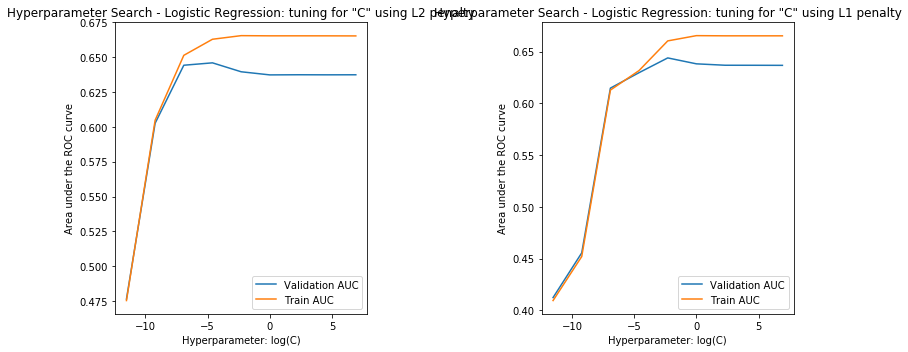

In [258]:
## plot the AUC-ROC against the 'C' values for train and cross-validation

## plot the AUC-ROC against the 'C' values for train and cross-validation
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.log(list(l2_auc_scores_cv.keys())), l2_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l2_auc_scores_train.keys())), l2_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L2 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()


plt.subplot(122)
plt.plot(np.log(list(l1_auc_scores_cv.keys())), l1_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l1_auc_scores_train.keys())), l1_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L1 penalty')
plt.xlabel('Hyperparameter: log(C)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.tight_layout()
plt.show()

In [259]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr1 = LogisticRegression(C=1.0, penalty='l1')
lr1.fit(X_train_tfidf_w2v, y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr1.predict_proba(X_test_tfidf_w2v)
fpr_test, tpr_test, threshold = roc_curve(y_test, pred_test_scores[:, 1])
l1_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr1.predict_proba(X_train_tfidf_w2v)
fpr_train, tpr_train, threshold = roc_curve(y_train, pred_train_scores[:, 1])
l1_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)

In [260]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr2 = LogisticRegression(C=1.0, penalty='l2')
lr2.fit(X_train_tfidf_w2v, y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr2.predict_proba(X_test_tfidf_w2v)
fpr_test, tpr_test, threshold = roc_curve(y_test, pred_test_scores[:, 1])
l2_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr2.predict_proba(X_train_tfidf_w2v)
fpr_train, tpr_train, threshold = roc_curve(y_train, pred_train_scores[:, 1])
l2_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)

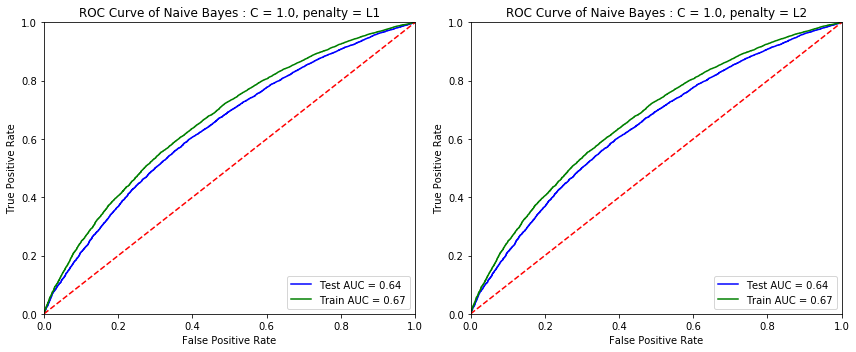

In [261]:
# Area under the ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l1_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l1_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 1.0, penalty = L1')

plt.subplot(122)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l2_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l2_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 1.0, penalty = L2')
plt.tight_layout()
plt.show()

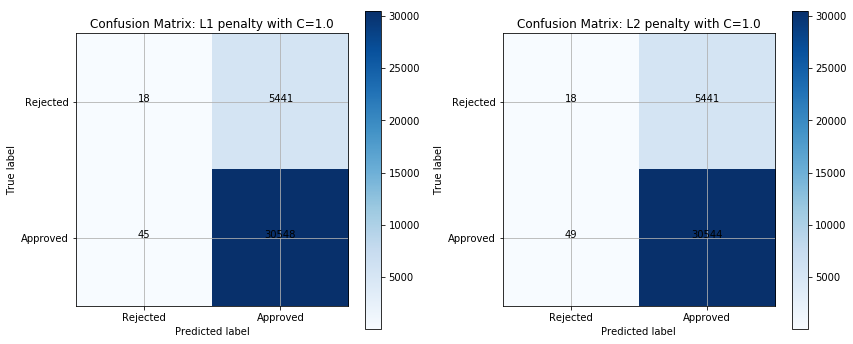

In [262]:
## Confusion Matrix:

# predict the response on the test data
pred_test = lr1.predict(X_test_tfidf_w2v)

c_mat1 = confusion_matrix(y_test, pred_test)

pred_test = lr2.predict(X_test_tfidf_w2v)

c_mat2 = confusion_matrix(y_test, pred_test)

classes = ['Rejected', 'Approved']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title("Confusion Matrix: L1 penalty with C=1.0")
plt.imshow(c_mat1, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat1.shape[0]), range(c_mat1.shape[1])):
        plt.text(j, i, c_mat1[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.subplot(122)
plt.title("Confusion Matrix: L2 penalty with C=1.0")
plt.imshow(c_mat2, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat2.shape[0]), range(c_mat2.shape[1])):
        plt.text(j, i, c_mat2[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.tight_layout()
plt.show()

# <h2> Logistic Regression with added Features `Set 5` </h2>

In [263]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

# train data
X_train_n = hstack((categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot, project_grade_category_one_hot, price_wo_std, qty_wo_std, teacher_prev_proj_wo_std, train_word_count_title, train_word_count_essay, sentiment_neg, sentiment_pos, sentiment_neu, sentiment_compound))
print("Data Matrix Dimensions:", X_train_n.shape)


# cross-validation data
X_cv_n = hstack((cv_categories_one_hot, cv_sub_categories_one_hot, cv_school_state_one_hot, cv_teacher_prefix_one_hot, cv_project_grade_category_one_hot, cv_price_wo_std, cv_qty_wo_std, cv_teacher_prev_proj_wo_std, cv_word_count_title, cv_word_count_essay, cv_sentiment_neg, cv_sentiment_pos, cv_sentiment_neu, cv_sentiment_compound))
print("CV Data Matrix Dimensions:", X_cv_n.shape)


# test_data
X_test_n = hstack((test_categories_one_hot, test_sub_categories_one_hot, test_school_state_one_hot, test_teacher_prefix_one_hot, test_project_grade_category_one_hot, test_price_wo_std, test_qty_wo_std, test_teacher_prev_proj_wo_std, test_word_count_title, test_word_count_essay, test_sentiment_neg, test_sentiment_pos, test_sentiment_neu, test_sentiment_compound))
print("Test Data Matrix Dimensions:", X_test_n.shape)


Data Matrix Dimensions: (49041, 108)
CV Data Matrix Dimensions: (24155, 108)
Test Data Matrix Dimensions: (36052, 108)


In [264]:
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

l2_auc_scores_cv = dict()
l2_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l2')
  lr.fit(X_train_n, y_train)
  pred_cv = lr.predict_proba(X_cv_n)
  pred_train = lr.predict_proba(X_train_n)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_cv, pred_cv[:, 1])
  l2_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_train, pred_train[:, 1])
  l2_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")

C: 1e-05
Validation-AUC: 0.6168783135314855
Train-AUC: 0.6171916257225483


C: 0.0001
Validation-AUC: 0.6223684214387963
Train-AUC: 0.6231108934356815


C: 0.001
Validation-AUC: 0.6204701056890962
Train-AUC: 0.6223950151729756


C: 0.01
Validation-AUC: 0.6193492189411198
Train-AUC: 0.6222037249162298


C: 0.1
Validation-AUC: 0.6165284257909154
Train-AUC: 0.6204381626052287


C: 1.0
Validation-AUC: 0.6150324249138748
Train-AUC: 0.6205618387214905


C: 10
Validation-AUC: 0.6134351049355062
Train-AUC: 0.6204839570687906


C: 100
Validation-AUC: 0.6162897556076554
Train-AUC: 0.6208094562978534


C: 1000
Validation-AUC: 0.6156749707775435
Train-AUC: 0.6205502930285858




In [265]:
l1_auc_scores_cv = dict()
l1_auc_scores_train = dict()
for i in C_values:
  print("C:", i)
  lr = LogisticRegression(C=i, penalty='l1')
  lr.fit(X_train_n, y_train)
  pred_cv = lr.predict_proba(X_cv_n)
  pred_train = lr.predict_proba(X_train_n)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_cv, pred_cv[:, 1])
  l1_auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(y_train, pred_train[:, 1])
  l1_auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")

C: 1e-05
Validation-AUC: 0.5867248218297934
Train-AUC: 0.5892190571627969


C: 0.0001
Validation-AUC: 0.6149966997587258
Train-AUC: 0.6155642946081582


C: 0.001
Validation-AUC: 0.6152802998607839
Train-AUC: 0.6154104210686374


C: 0.01
Validation-AUC: 0.615109771609003
Train-AUC: 0.617576883943685


C: 0.1
Validation-AUC: 0.6185191693738676
Train-AUC: 0.6210369740783985


C: 1.0
Validation-AUC: 0.6139159404441654
Train-AUC: 0.6212963234119437


C: 10
Validation-AUC: 0.6130090177602046
Train-AUC: 0.6209472927146062


C: 100
Validation-AUC: 0.6130686486203674
Train-AUC: 0.6208697767186604


C: 1000
Validation-AUC: 0.612909659673741
Train-AUC: 0.6209006245579154




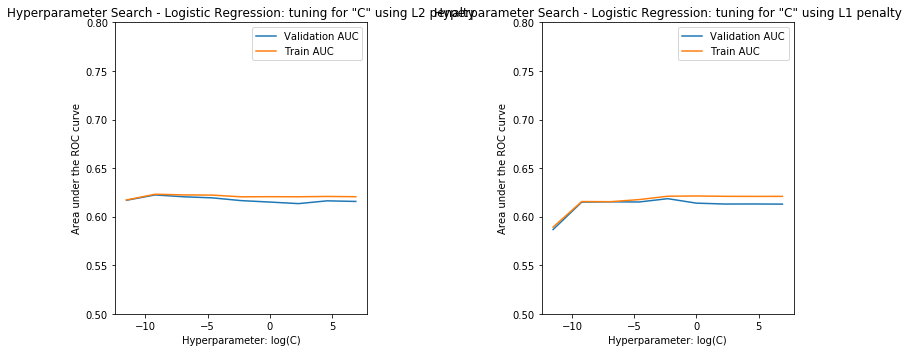

In [266]:
## plot the AUC-ROC against the 'C' values for train and cross-validation

## plot the AUC-ROC against the 'C' values for train and cross-validation
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.log(list(l2_auc_scores_cv.keys())), l2_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l2_auc_scores_train.keys())), l2_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L2 penalty')
plt.xlabel('Hyperparameter: log(C)')
plt.ylim([0.5,0.8])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()


plt.subplot(122)
plt.plot(np.log(list(l1_auc_scores_cv.keys())), l1_auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(l1_auc_scores_train.keys())), l1_auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - Logistic Regression: tuning for "C" using L1 penalty')
plt.xlabel('Hyperparameter: log(C)')
plt.ylim([0.5, 0.8])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.tight_layout()
plt.show()

In [267]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr1 = LogisticRegression(C=0.1, penalty='l1')
lr1.fit(X_train_n, y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr1.predict_proba(X_test_n)
fpr_test, tpr_test, threshold = roc_curve(y_test, pred_test_scores[:, 1])
l1_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr1.predict_proba(X_train_n)
fpr_train, tpr_train, threshold = roc_curve(y_train, pred_train_scores[:, 1])
l1_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)

In [268]:
# Fit a model with the optimal hyperparameter value for C and penalty
lr2 = LogisticRegression(C=0.01, penalty='l2')
lr2.fit(X_train_n, y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = lr2.predict_proba(X_test_n)
fpr_test, tpr_test, threshold = roc_curve(y_test, pred_test_scores[:, 1])
l2_roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = lr2.predict_proba(X_train_n)
fpr_train, tpr_train, threshold = roc_curve(y_train, pred_train_scores[:, 1])
l2_roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)

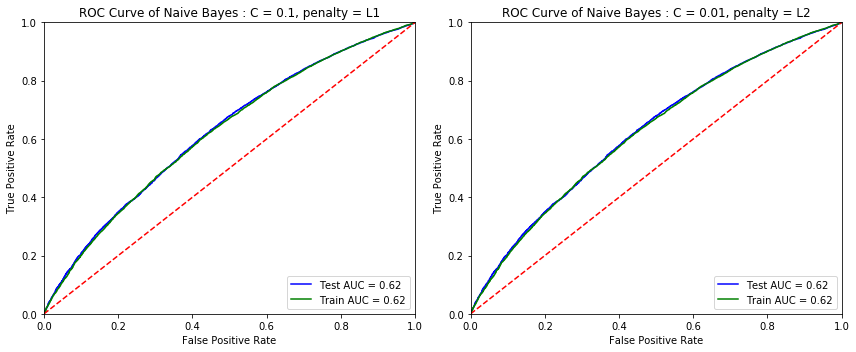

In [269]:
# Area under the ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l1_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l1_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.1, penalty = L1')

plt.subplot(122)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % l2_roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % l2_roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : C = 0.01, penalty = L2')
plt.tight_layout()
plt.show()


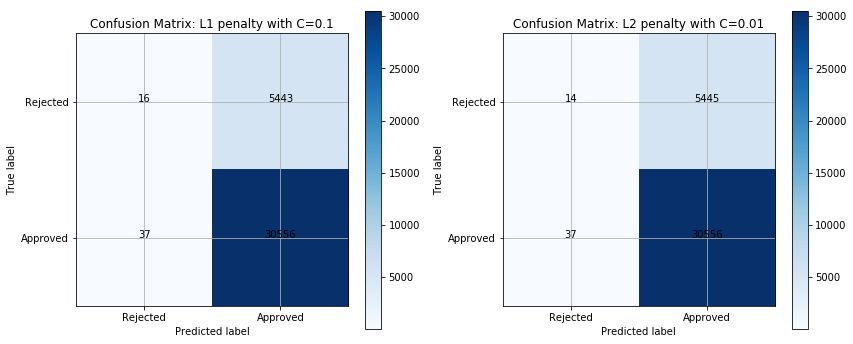

In [270]:
## Confusion Matrix:

# predict the response on the test data
pred_test = lr1.predict(X_test_n)

c_mat1 = confusion_matrix(y_test, pred_test)

pred_test = lr2.predict(X_test_n)

c_mat2 = confusion_matrix(y_test, pred_test)

classes = ['Rejected', 'Approved']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title("Confusion Matrix: L1 penalty with C=0.1")
plt.imshow(c_mat1, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat1.shape[0]), range(c_mat1.shape[1])):
        plt.text(j, i, c_mat1[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.subplot(122)
plt.title("Confusion Matrix: L2 penalty with C=0.01")
plt.imshow(c_mat2, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat2.shape[0]), range(c_mat2.shape[1])):
        plt.text(j, i, c_mat2[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()

plt.tight_layout()
plt.show()

<h1>2. Logistic Regression </h1>

<h1>3. Conclusion</h1>

In [271]:
from prettytable import PrettyTable

x = PrettyTable(["Vectorizer", "Hyperparamter: penalty", "Hyperparameter: C", "AUC"])

x.add_row(["BOW", "L1", "0.1", "0.7199"])
x.add_row(["BOW", "L2", "0.01", "0.7141"])
x.add_row(["TFIDF", "L1", "1.0", "0.7192"])
x.add_row(["TFIDF", "L2", "0.1", "0.7105"])
x.add_row(["AVG-W2V", "L1", "1.0", "0.7068"])
x.add_row(["AVG-W2V", "L2", "1.0", "0.7075"])
x.add_row(["TFIDF-W2V", "L1", "1.0", "0.7023"])
x.add_row(["TFIDF-W2V", "L2", "1.0", "0.7024"])
x.add_row(["No_textt_Vectorizer", "L1", "0.1", "0.6344"])
x.add_row(["No_text_Vectorizer", "L2", "0.01", "0.6333"])

print(x)

+---------------------+------------------------+-------------------+--------+
|      Vectorizer     | Hyperparamter: penalty | Hyperparameter: C |  AUC   |
+---------------------+------------------------+-------------------+--------+
|         BOW         |           L1           |        0.1        | 0.7199 |
|         BOW         |           L2           |        0.01       | 0.7141 |
|        TFIDF        |           L1           |        1.0        | 0.7192 |
|        TFIDF        |           L2           |        0.1        | 0.7105 |
|       AVG-W2V       |           L1           |        1.0        | 0.7068 |
|       AVG-W2V       |           L2           |        1.0        | 0.7075 |
|      TFIDF-W2V      |           L1           |        1.0        | 0.7023 |
|      TFIDF-W2V      |           L2           |        1.0        | 0.7024 |
| No_textt_Vectorizer |           L1           |        0.1        | 0.6344 |
|  No_text_Vectorizer |           L2           |        0.01    